In [255]:
import pandas as pd
import category_encoders as ce

count_enc = ce.CountEncoder(normalize=True)

In [256]:
from src.data.build_features3 import _onehot_encode_features, _frequency_encode_features

### Counting numbers of frequency

In [257]:
group_df = pd.read_pickle ('scripts/tmp_selected_group_features.pkl')
technique_df = pd.read_pickle ('scripts/tmp_selected_technique_features.pkl')

In [258]:
technique_software_df = pd.read_csv('data/interim/collected_techniques_software_df.csv')
group_software_df = pd.read_csv('data/interim/collected_groups_software_df.csv')

In [259]:
freq_enc_group_df = pd.read_pickle ('scripts/tmp_freq_enc_group_features.pkl')
freq_enc_technique_df = pd.read_pickle ('scripts/tmp_freq_enc_technique_features.pkl')

In [260]:
freq_enc_group_df

,group_ID,0.0011876484560570072,0.0023752969121140144,0.0035629453681710215,0.004750593824228029,0.0059382422802850355,0.007125890736342043,0.00831353919239905,0.009501187648456057,0.010688836104513063,0.011876484560570071,0.014251781472684086,0.015439429928741092,0.0166270783847981,0.02494061757719715,0.032066508313539195,0.0344418052256532,0.048693586698337295
0,G0099,0.001188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,G0006,0.001188,0.000000,0.000000,0.000000,0.005938,0.007126,0.000000,0.000000,0.010689,0.000000,0.014252,0.015439,0.000000,0.000000,0.032067,0.034442,0.048694
2,G0005,0.001188,0.002375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,G0023,0.001188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,G0025,0.000000,0.000000,0.003563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,G0044,0.001188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
132,G0102,0.001188,0.002375,0.003563,0.004751,0.000000,0.007126,0.000000,0.000000,0.000000,0.011876,0.000000,0.000000,0.016627,0.024941,0.032067,0.034442,0.048694
133,G0128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
134,G0018,0.001188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009501,0.010689,0.000000,0.014252,0.015439,0.000000,0.000000,0.032067,0.000000,0.000000


In [261]:
freq_enc_technique_df

,technique_ID,0.0005221932114882506,0.0010443864229765013,0.001566579634464752,0.0020887728459530026,0.0026109660574412533,0.003133159268929504,0.0036553524804177544,0.004177545691906005,0.004699738903394256,...,0.03185378590078329,0.033942558746736295,0.03759791122715405,0.04490861618798955,0.04751958224543081,0.04908616187989556,0.05430809399477807,0.05639686684073107,0.11801566579634465,0.13994778067885116
0,T1548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.033943,0.0,0.000000,0.0,0.049086,0.054308,0.000000,0.118016,0.139948
1,T1548.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.033943,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.118016,0.139948
2,T1548.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.049086,0.000000,0.000000,0.118016,0.000000
3,T1548.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.054308,0.000000,0.000000,0.139948
4,T1548.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.054308,0.000000,0.118016,0.139948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,T1102.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031854,0.000000,0.0,0.044909,0.0,0.000000,0.000000,0.056397,0.000000,0.000000
603,T1102.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.044909,0.0,0.000000,0.000000,0.056397,0.000000,0.000000
604,T1102.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031854,0.000000,0.0,0.044909,0.0,0.000000,0.000000,0.056397,0.000000,0.000000
605,T1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031854,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.118016,0.139948


`build_features_freq_encode` function

In [262]:
from src.data.build_features3 import build_features_freq_encode

In [263]:
# group_df = pd.read_pickle ('scripts/tmp_selected_group_features.pkl')
# technique_df = pd.read_pickle ('scripts/tmp_selected_technique_features.pkl')
# res_t, res_g = build_features_freq_encode(technique_features_df= technique_df, technique_feature_names=['software_ID'], 
#                                           group_features_df= group_df, group_features_names=['software_ID'], save_as_csv= False)

In [264]:
# res_g

In [265]:
# res_t

In [266]:
# import category_encoders as ce

# count_enc = ce.CountEncoder(normalize=False)
# df = technique_df
# feature_name = 'software_ID'
# id = 'technique_ID'
# id_col = df[[id]]
# feature_single_valued = df[[feature_name]].explode(feature_name)
# freq_enc = ce.CountEncoder(normalize=False, handle_missing= 'return_nan') #❗return nan
# feature_freq_encoded = freq_enc.fit_transform (feature_single_valued[feature_name], return_df = True)
# feature_freq_encoded_oh = pd.get_dummies(feature_freq_encoded[feature_name], dtype= float)
# feature_freq_encoded_oh = feature_freq_encoded_oh.groupby(level=0).max()
# feature_freq_encoded_oh_true_val = feature_freq_encoded_oh.multiply(feature_freq_encoded_oh.columns, axis= 1)


In [267]:
# feature_freq_encoded_oh_true_val

In [268]:
# feature_single_valued = df[[feature_name]].explode(feature_name)
# feature_single_valued

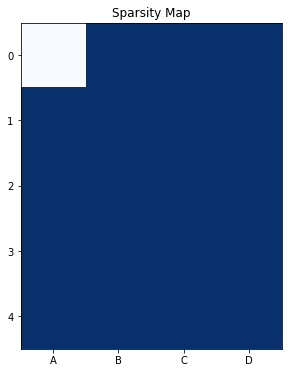

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {'A': [1, 0, 0, 0, 0],
        'B': [0, 0, 0, 0, 0],
        'C': [0, 0, 0, 0, 0],
        'D': [0, 0, 0, 0, 0]}
df = pd.DataFrame(data)

# Create a binary mask where 0 values are True and non-zero values are False
mask = df == 0

# Plot the sparsity map using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(mask, cmap='Blues', interpolation='nearest')
plt.title("Sparsity Map")
plt.xticks(range(df.shape[1]), df.columns, rotation=0)
plt.yticks(range(df.shape[0]), df.index)
plt.show()


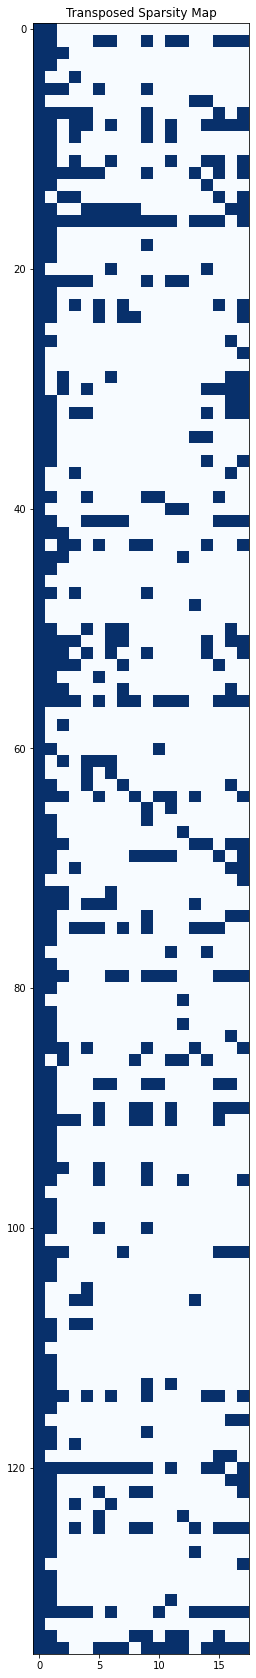

In [270]:
file_path = 'data/interim/X_group_freq_enc.csv'
df = pd.read_csv (file_path)
mask = df != 0
# mask_transposed = mask.T
# Plot the sparsity map using Matplotlib
plt.figure(figsize=(10, 30))
plt.imshow(mask, cmap='Blues', interpolation='nearest')
plt.title("Transposed Sparsity Map")
# plt.xticks(range(df.shape[0]), df.index, rotation=0)
# plt.yticks(range(df.shape[1]), df.columns)
plt.show()

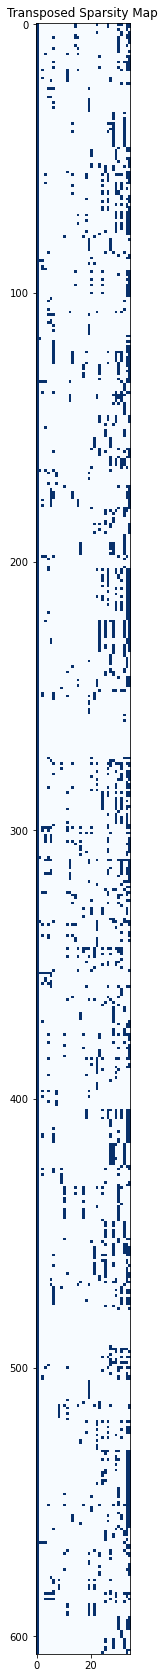

In [271]:
file_path = 'data/interim/X_technique_freq_enc.csv'
df = pd.read_csv (file_path)
mask = df != 0
# mask_transposed = mask.T
# Plot the sparsity map using Matplotlib
plt.figure(figsize=(10, 30))
plt.imshow(mask, cmap='Blues', interpolation='nearest')
plt.title("Transposed Sparsity Map")
# plt.xticks(range(df.shape[0]), df.index, rotation=0)
# plt.yticks(range(df.shape[1]), df.columns)
plt.show()